## Proportion of Singletons resulting from SVs from a single cohort

In [1]:
source = 'CCDG'
do_resample = False 
operator = 'min'

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width: 100% !important; }</style>"))

In [3]:
import pandas as pd 
pd.set_option('display.max_columns', 30)

In [4]:
from aps import get_noncoding_svs_windows

get_noncoding_svs_windows(source)

,sv_id,sv_length,alt_allele_count,N_bar,negative K_bar,negative chen zscore,sv is singleton
0,119394,1394,>1,-1.869842,-0.504937,-0.413076,False
1,119444,2521,>1,5.954858,1.065578,9.097270,False
2,119450,2511,>1,2.057544,1.007262,8.443629,False
3,119450,2511,>1,4.023027,1.455451,5.706162,False
4,119450,2511,>1,1.600825,1.789779,2.620718,False
...,...,...,...,...,...,...,...
287665,309894,5144,1,-1.036694,-0.545000,1.498359,True
287666,309894,5144,1,0.012776,0.010219,1.269136,True
287667,309894,5144,1,-1.092958,0.333405,-1.242489,True
287668,309894,5144,1,0.695360,0.432403,3.189693,True


In [5]:
from aps import aggregate_over_windows

aggregate_over_windows(get_noncoding_svs_windows(source))

,sv_id,sv_length,alt_allele_count,sv is singleton,min N_bar,mean N_bar,min negative K_bar,mean negative K_bar,min negative chen zscore,mean negative chen zscore
0,119394,1394,>1,False,-1.869842,-1.869842,-0.504937,-0.504937,-0.413076,-0.413076
1,119444,2521,>1,False,5.954858,5.954858,1.065578,1.065578,9.097270,9.097270
2,119450,2511,>1,False,1.600825,2.560465,1.007262,1.417497,2.620718,5.590170
3,119489,3049,>1,False,2.408743,2.408743,-0.264785,-0.264785,3.518609,3.518609
4,119504,8398,>1,False,-0.945519,-0.384728,-0.041867,0.284826,0.702770,1.952018
...,...,...,...,...,...,...,...,...,...,...
63905,438421,4242,1,True,-1.184616,-1.082219,-0.329059,0.179812,-3.388068,-2.339702
63906,438447,1069,1,True,-0.775127,-0.775127,0.168243,0.168243,4.280054,4.280054
63907,438448,1540,1,True,-1.616092,-1.616092,0.996819,0.996819,-0.123849,-0.123849
63908,438489,767,1,True,-1.809946,-1.809946,1.056274,1.056274,-0.093739,-0.093739


In [6]:
from aps import get_svs 

svs = get_svs(source, do_resample)
svs

,sv_id,sv_length,alt_allele_count,sv is singleton,min N_bar,mean N_bar,min negative K_bar,mean negative K_bar,min negative chen zscore,mean negative chen zscore
0,119394,1394,>1,False,-1.869842,-1.869842,-0.504937,-0.504937,-0.413076,-0.413076
1,119444,2521,>1,False,5.954858,5.954858,1.065578,1.065578,9.097270,9.097270
2,119450,2511,>1,False,1.600825,2.560465,1.007262,1.417497,2.620718,5.590170
3,119489,3049,>1,False,2.408743,2.408743,-0.264785,-0.264785,3.518609,3.518609
4,119504,8398,>1,False,-0.945519,-0.384728,-0.041867,0.284826,0.702770,1.952018
...,...,...,...,...,...,...,...,...,...,...
63905,438421,4242,1,True,-1.184616,-1.082219,-0.329059,0.179812,-3.388068,-2.339702
63906,438447,1069,1,True,-0.775127,-0.775127,0.168243,0.168243,4.280054,4.280054
63907,438448,1540,1,True,-1.616092,-1.616092,0.996819,0.996819,-0.123849,-0.123849
63908,438489,767,1,True,-1.809946,-1.809946,1.056274,1.056274,-0.093739,-0.093739


In [7]:
from aps import (
    parameters_to_estimate_singleton_probability_under_null,
    label_svs_with_length_quantiles
)

params = parameters_to_estimate_singleton_probability_under_null[source]  

svs = label_svs_with_length_quantiles(svs, params)
svs 

,sv_id,sv_length,alt_allele_count,sv is singleton,min N_bar,mean N_bar,min negative K_bar,mean negative K_bar,min negative chen zscore,mean negative chen zscore,sv length quantile
0,119394,1394,>1,False,-1.869842,-1.869842,-0.504937,-0.504937,-0.413076,-0.413076,31
1,119444,2521,>1,False,5.954858,5.954858,1.065578,1.065578,9.097270,9.097270,49
2,119450,2511,>1,False,1.600825,2.560465,1.007262,1.417497,2.620718,5.590170,49
3,119489,3049,>1,False,2.408743,2.408743,-0.264785,-0.264785,3.518609,3.518609,55
4,119504,8398,>1,False,-0.945519,-0.384728,-0.041867,0.284826,0.702770,1.952018,85
...,...,...,...,...,...,...,...,...,...,...,...
63905,438421,4242,1,True,-1.184616,-1.082219,-0.329059,0.179812,-3.388068,-2.339702,66
63906,438447,1069,1,True,-0.775127,-0.775127,0.168243,0.168243,4.280054,4.280054,23
63907,438448,1540,1,True,-1.616092,-1.616092,0.996819,0.996819,-0.123849,-0.123849,34
63908,438489,767,1,True,-1.809946,-1.809946,1.056274,1.056274,-0.093739,-0.093739,16


In [8]:
from aps import aggregate_over_length_quantiles

aggregated_over_length_quantiles = aggregate_over_length_quantiles(svs, params)
aggregated_over_length_quantiles

sv length quantile      sv_length       sv is singleton        \
                                mean count            mean count   
0                   0     104.036517   712        0.648876   712   
1                   1     112.463333   600        0.675000   600   
2                   2     120.424806   645        0.624806   645   
3                   3     129.502423   619        0.654281   619   
4                   4     141.068079   661        0.632375   661   
..                ...            ...   ...             ...   ...   
95                 95   19169.276995   639        0.658842   639   
96                 96   23978.137715   639        0.676056   639   
97                 97   32198.201878   639        0.719875   639   
98                 98   48214.303599   639        0.694836   639   
99                 99  109313.068750   640        0.760938   640   

   estimated singleton probability under null  
                                               
0                                    0.657970  
1                                    0.644876  
2                                    0.650053  
3                                    0.655887  
4                                    0.646140  
..                                        ...  
95                                   0.665401  
96                                   0.676738  
97                                   0.693147  
98                                   0.717836  
99                                   0.755076  

[100 rows x 6 columns]

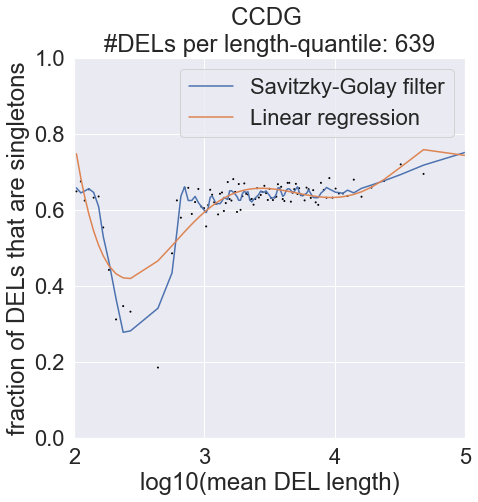

In [9]:
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = (7, 7)

import seaborn as sns 
sns.set(font_scale = 2)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import numpy as np 

def plot_singleton_proportion_vs_sv_length_quantile(up_weight_range=None, weight_scale=None): 
    x = np.log10(aggregated_over_length_quantiles[('sv_length', 'mean')])
    y = aggregated_over_length_quantiles[('sv is singleton', 'mean')]
    y_filtered = aggregated_over_length_quantiles['estimated singleton probability under null']
    
    sample_weight = np.ones(len(x)) 
    if up_weight_range: 
        sample_weight[
            (x > up_weight_range[0]) &
            (x < up_weight_range[1])
        ] *= weight_scale

    plt.scatter(x, y, s=sample_weight, c='grey', edgecolor='black')
    plt.plot(x, y_filtered, label='Savitzky-Golay filter')    
    plt.ylim([0, 1])
    plt.xlim([2, 5])
    plt.xticks([2, 3, 4, 5])
    plt.xlabel(f'log10(mean DEL length)')
    plt.ylabel(f'fraction of DELs that are singletons')
    mean_number_svs_per_length_quantile = int(np.mean(aggregated_over_length_quantiles[('sv_length', 'count')]))
    plt.title(f'{source} \n#DELs per length-quantile: {mean_number_svs_per_length_quantile}')
    
    model = make_pipeline(PolynomialFeatures(params['degree']), LinearRegression())
    x = np.array(x)
    X = x[:, np.newaxis]
    y = np.array(y)    
    model.fit(X, y, linearregression__sample_weight=sample_weight)
    y_hat = model.predict(X)
    plt.plot(x, y_hat, label='Linear regression')
    
    plt.legend()
    
plot_singleton_proportion_vs_sv_length_quantile()

In [10]:
from aps import label_svs_with_null_statistics

svs = label_svs_with_null_statistics(svs, aggregated_over_length_quantiles)
svs

,sv_id,sv_length,alt_allele_count,sv is singleton,min N_bar,mean N_bar,min negative K_bar,mean negative K_bar,min negative chen zscore,mean negative chen zscore,sv length quantile,mean(isSingleton) under null,variance(isSingleton) under null
0,119394,1394,>1,False,-1.869842,-1.869842,-0.504937,-0.504937,-0.413076,-0.413076,31,0.632941,0.232327
1,121483,1414,>1,False,-0.214144,0.056918,1.824091,1.826873,0.091101,1.146842,31,0.632941,0.232327
2,122403,1395,>1,False,-0.924311,-0.924311,-2.309368,-2.309368,0.318741,0.318741,31,0.632941,0.232327
3,123169,1416,>1,False,-4.799508,-3.259316,0.912159,1.306560,-2.972916,-0.876463,31,0.632941,0.232327
4,123536,1415,1,True,0.645336,1.513429,0.122400,0.817732,-1.972607,1.770363,31,0.632941,0.232327
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63905,432902,93793,1,True,-2.751938,-0.130429,-1.801204,0.167389,-2.983159,0.135430,99,0.755076,0.184936
63906,434334,64641,>1,False,-1.717475,0.727131,-2.348217,-0.361595,-5.759063,-1.224686,99,0.755076,0.184936
63907,434845,86271,1,True,-0.210703,1.637860,-2.067288,-0.075640,-1.832571,1.814920,99,0.755076,0.184936
63908,435471,75930,>1,False,-3.254459,-0.827197,-1.545256,0.010003,-3.863799,-0.022791,99,0.755076,0.184936


In [11]:
from aps import label_svs_with_score_quantiles

score = 'negative chen zscore'
label_svs_with_score_quantiles(svs, score=score, operator=operator, params=params)

,sv_id,sv_length,alt_allele_count,sv is singleton,min N_bar,mean N_bar,min negative K_bar,mean negative K_bar,min negative chen zscore,mean negative chen zscore,sv length quantile,mean(isSingleton) under null,variance(isSingleton) under null,(min negative chen zscore) quantile
0,119394,1394,>1,False,-1.869842,-1.869842,-0.504937,-0.504937,-0.413076,-0.413076,31,0.632941,0.232327,0.5 - 0.75
1,121483,1414,>1,False,-0.214144,0.056918,1.824091,1.826873,0.091101,1.146842,31,0.632941,0.232327,0.5 - 0.75
2,122403,1395,>1,False,-0.924311,-0.924311,-2.309368,-2.309368,0.318741,0.318741,31,0.632941,0.232327,0.5 - 0.75
3,123169,1416,>1,False,-4.799508,-3.259316,0.912159,1.306560,-2.972916,-0.876463,31,0.632941,0.232327,0.05 - 0.1
4,123536,1415,1,True,0.645336,1.513429,0.122400,0.817732,-1.972607,1.770363,31,0.632941,0.232327,0.1 - 0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63905,432902,93793,1,True,-2.751938,-0.130429,-1.801204,0.167389,-2.983159,0.135430,99,0.755076,0.184936,0.05 - 0.1
63906,434334,64641,>1,False,-1.717475,0.727131,-2.348217,-0.361595,-5.759063,-1.224686,99,0.755076,0.184936,0.0 - 0.02
63907,434845,86271,1,True,-0.210703,1.637860,-2.067288,-0.075640,-1.832571,1.814920,99,0.755076,0.184936,0.1 - 0.25
63908,435471,75930,>1,False,-3.254459,-0.827197,-1.545256,0.010003,-3.863799,-0.022791,99,0.755076,0.184936,0.02 - 0.05


In [12]:
from aps import aggregate_over_score_quantiles 

aggregate_over_score_quantiles(label_svs_with_score_quantiles(svs, score=score, operator=operator, params=params), score=score, operator=operator)

(min negative chen zscore) quantile sv is singleton         \
                                                  sum  count   
0                          0.0 - 0.02             814   1279   
1                         0.02 - 0.05            1244   1917   
2                          0.05 - 0.1            2066   3195   
3                          0.1 - 0.25            6158   9588   
4                          0.25 - 0.5           10123  15976   
5                          0.5 - 0.75            9880  15977   
6                          0.75 - 0.9            5799   9587   
7                          0.9 - 0.95            1906   3195   
8                         0.95 - 0.98            1115   1917   
9                          0.98 - 1.0             749   1279   

  mean(isSingleton) under null        variance(isSingleton) under null         \
                           sum  count                              sum  count   
0                   826.595509   1279                       287.265158   1279   
1                  1234.565779   1917                       433.084872   1917   
2                  2047.201648   3195                       723.701406   3195   
3                  6098.814209   9588                      2185.013511   9588   
4                 10037.276663  15976                      3665.140209  15976   
5                  9893.790868  15977                      3679.330705  15977   
6                  5841.264039   9587                      2212.371883   9587   
7                  1927.387353   3195                       738.531532   3195   
8                  1161.731200   1917                       443.251188   1917   
9                   786.400178   1279                       294.212857   1279   

  min negative chen zscore           observed F mean(F) under null  \
                      mean       std                                 
0                -5.188013  1.024898   0.636435           0.646283   
1                -3.691282  0.212892   0.648931           0.644009   
2                -3.021630  0.182849   0.646635           0.640752   
3                -2.147492  0.304175   0.642261           0.636088   
4                -1.040964  0.349184   0.633638           0.628272   
5                 0.174109  0.380516   0.618389           0.619252   
6                 1.533995  0.420185   0.604882           0.609290   
7                 2.865967  0.328264   0.596557           0.603251   
8                 4.210323  0.465181   0.581638           0.606015   
9                 6.904697  1.337411   0.585614           0.614855   

  variance(F) under null observed F, relative to null zscore(F)  
                                                                 
0               0.000176                     0.984762 -0.743146  
1               0.000118                     1.007642  0.453335  
2               0.000071                     1.009182  0.698779  
3               0.000024                     1.009704  1.266165  
4               0.000014                     1.008540  1.415969  
5               0.000014                     0.998606 -0.227356  
6               0.000024                     0.992765 -0.898549  
7               0.000072                     0.988903 -0.786996  
8               0.000121                     0.959775 -2.219637  
9               0.000180                     0.952441 -2.180433

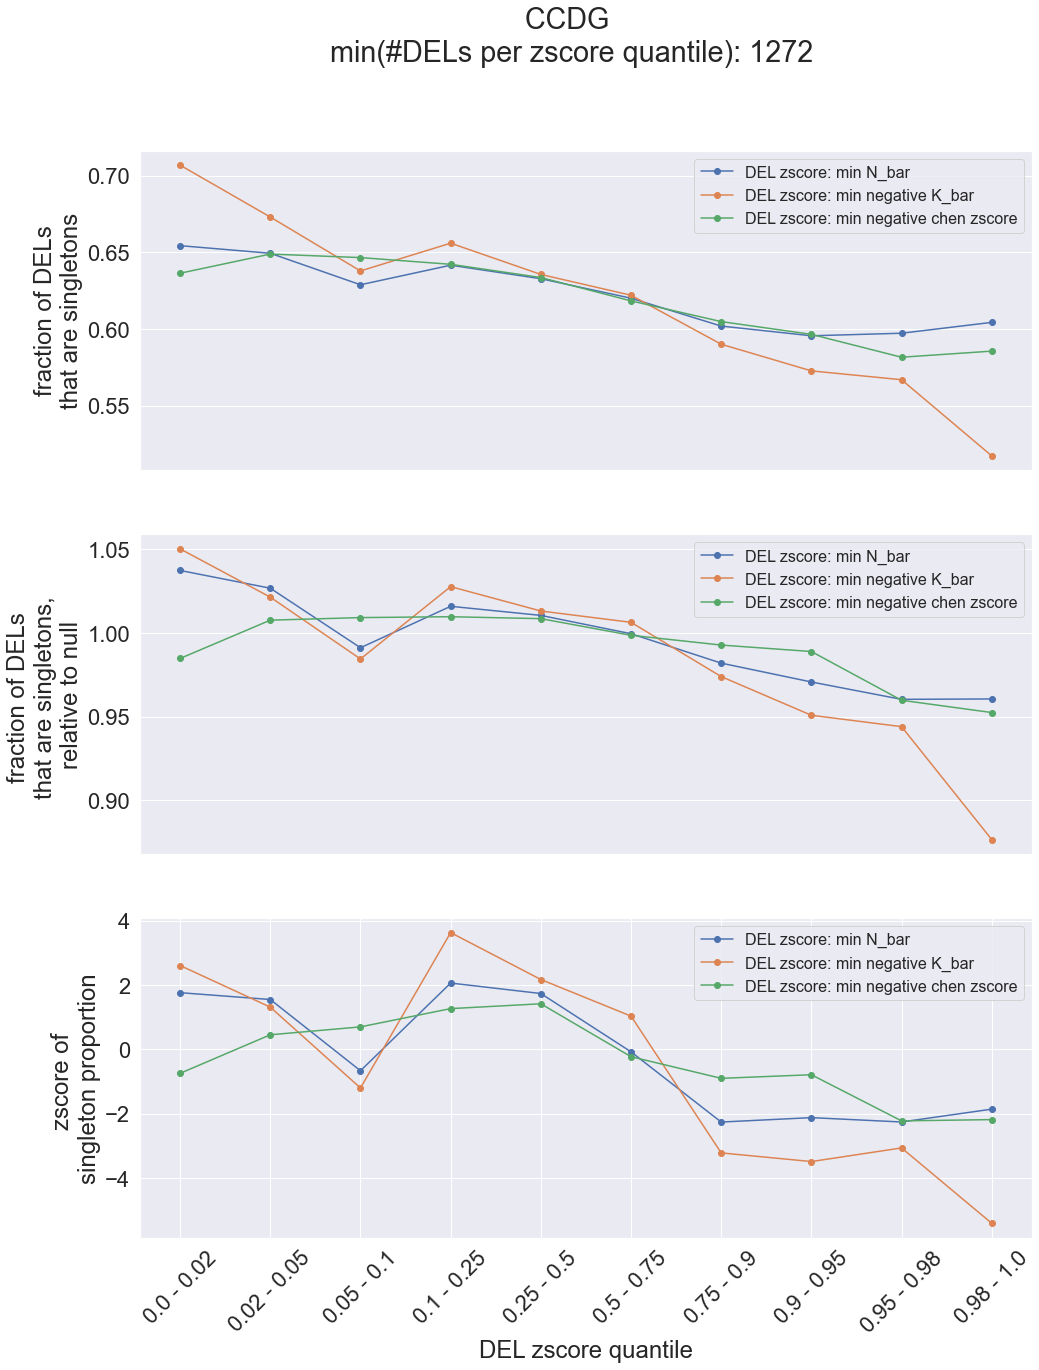

In [13]:
plt.rcParams["figure.figsize"] = (16, 20)

def plot_singleton_proportion_vs_score_core(score, plot_quantile): 
    df = label_svs_with_score_quantiles(svs, score, operator, params)
    df = aggregate_over_score_quantiles(df, score, operator)
    min_number_svs_per_zscore_quantile = int(np.min(df[('sv is singleton', 'count')]))    

    operator_plus_score = f'{operator} {score}'
    x = f'({operator_plus_score}) quantile' if plot_quantile else (operator_plus_score, 'mean')
    
    plt.subplot(3, 1, 1)
    plt.plot(df[x], df['observed F'], 'o-', label=f'DEL zscore: {operator_plus_score}')
    plt.xticks([])
    plt.ylabel('fraction of DELs\nthat are singletons')
    plt.legend(fontsize=16)
#     plt.ylim([0, 1])

    plt.subplot(3, 1, 2)
    plt.plot(df[x], df['observed F, relative to null'], 'o-', label=f'DEL zscore: {operator_plus_score}')
    plt.ylabel('fraction of DELs \nthat are singletons, \nrelative to null')
    plt.legend(fontsize=16)
    plt.xticks([])
#     plt.ylim([-0.15, 0.15])
    
    plt.subplot(3, 1, 3)
    plt.plot(df[x], df['zscore(F)'], 'o-', label=f'DEL zscore: {operator_plus_score}')
    plt.ylabel('zscore of \nsingleton proportion')
    plt.legend(fontsize=16)
    plt.xticks(rotation = 45)
#     plt.ylim([-7, 5])

    return min_number_svs_per_zscore_quantile

def plot_singleton_proportion_vs_score(plot_quantile): 
    min_number_svs_per_zscore_quantile = min(
        plot_singleton_proportion_vs_score_core(score='N_bar', plot_quantile=plot_quantile),
        plot_singleton_proportion_vs_score_core(score='negative K_bar', plot_quantile=plot_quantile),
        plot_singleton_proportion_vs_score_core(score='negative chen zscore', plot_quantile=plot_quantile)
    )
    plt.suptitle(f'{source} \nmin(#DELs per zscore quantile): {min_number_svs_per_zscore_quantile}')
    if plot_quantile: plt.xlabel(f'DEL zscore quantile')
    else: plt.xlabel(f'DEL zscore')
    
plot_singleton_proportion_vs_score(plot_quantile=True)

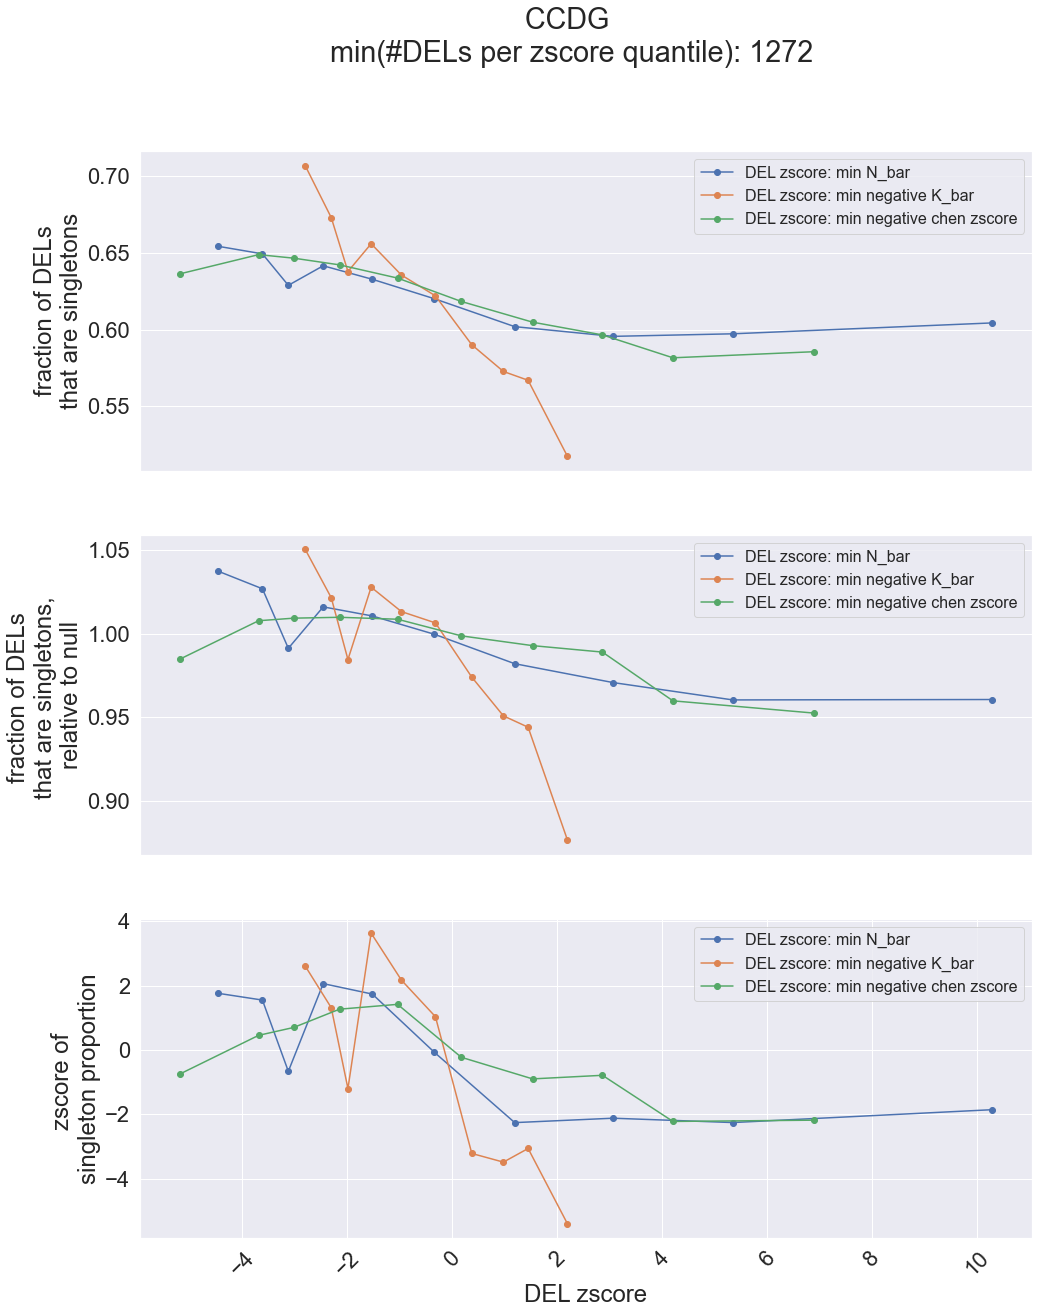

In [14]:
plot_singleton_proportion_vs_score(plot_quantile=False)

## Bootstrapped Adjusted Proportion of Singletons

In [15]:
# from aps import resample_aps

# resample_aps(source, score, operator)

In [16]:
import pickle

def bootstrap_aps():
    with open('aps.pkl', 'rb') as handle:
        df = pickle.load(handle)
    return df 

bootstrap_aps()['gnomAD']['N_bar']

(min N_bar) quantile observed F, relative to null  \
                                               mean   
0           0.0 - 0.02                     1.069342   
1          0.02 - 0.05                     1.052553   
2           0.05 - 0.1                     1.053743   
3           0.1 - 0.25                     1.012910   
4           0.25 - 0.5                     1.023697   
5           0.5 - 0.75                     0.983759   
6           0.75 - 0.9                     0.989863   
7           0.9 - 0.95                     0.955705   
8          0.95 - 0.98                     0.922739   
9           0.98 - 1.0                     0.829036   

                                                   
  number of bootstrap samples  ci_lower  ci_upper  
0                         100  1.023646  1.116699  
1                         100  1.020992  1.087951  
2                         100  1.031509  1.079537  
3                         100  0.995266  1.030909  
4                         100  1.012697  1.036360  
5                         100  0.972467  0.993960  
6                         100  0.975432  1.007306  
7                         100  0.921378  0.982917  
8                         100  0.877222  0.958279  
9                         100  0.780689  0.870604

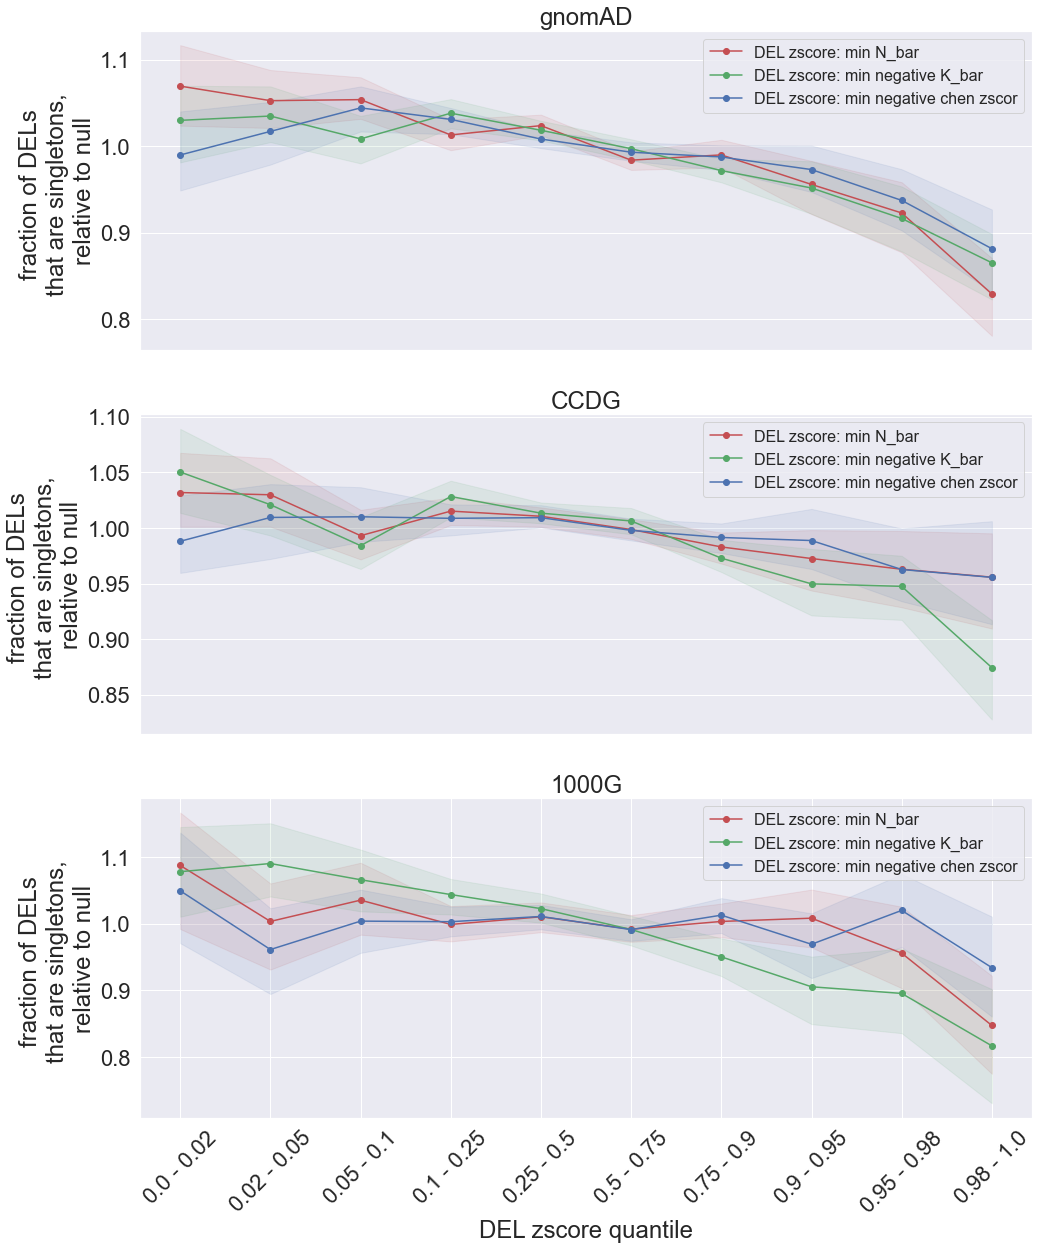

In [17]:
def plot_bootstrapped_aps_vs_score_quantile(): 
    aps = bootstrap_aps()
    sources = list(aps.keys())
    scores = aps[sources[0]].keys()
    for i, source in enumerate(sources): 
        plt.subplot(len(sources), 1, i+1)
        plt.title(f'{source}')
        colors = ['r', 'g', 'b']
#         plt.ylim([-0.15, 0.075])
        for score, color in zip(scores, colors):     
            df = aps[source][score]
            operator_plus_score = df.columns[0][0].strip('(quantile) ')
            x = df[df.columns[0]]
            plt.plot(x, df[('observed F, relative to null', 'mean')], 'o-', color=color, label=f'DEL zscore: {operator_plus_score}')
            plt.fill_between(x, 
                             df[('observed F, relative to null', 'ci_lower')],
                             df[('observed F, relative to null', 'ci_upper')],
                             alpha=0.1, 
                             color=color
            )
            plt.ylabel('fraction of DELs \nthat are singletons, \nrelative to null')
            plt.legend(fontsize=16)
            if i == len(sources)-1: plt.xticks(rotation = 45)
            else: plt.xticks([])             
    plt.xlabel(f'DEL zscore quantile')
    
plot_bootstrapped_aps_vs_score_quantile()